In [3]:
import sys
sys.path.append('/Users/pvrancx/Documents/Code/PyALE/src')

In [1]:
%%writefile ../src/util/RLGlueRunner.py
from multiprocessing import Process
import os
import rlglue.RLGlue as RLGlue
from rlglue.agent import AgentLoader as AgentLoader



def run_rlglue():
    os.system('rl_glue')
    
def run_ale(ale_path,game):
    ale_str = ''+ale_path + '/ale -display_screen false -game_controller rlglue -frame_skip 5 -disable_colour_averaging -use_environment_distribution '+ale_path +'/roms/'+game 
    os.system(ale_str)   

def run_experiment(maxsteps=100,numeps=1):
    taskSpec = RLGlue.RL_init()
    for ep in range(numeps):
        terminal=RLGlue.RL_episode(maxsteps)
        totalSteps=RLGlue.RL_num_steps()
        totalReward=RLGlue.RL_return()
        print "Episode "+str(ep)+"\t "+str(totalSteps)+ " steps \t" + str(totalReward) + " total reward\t " + str(terminal) + " natural end"
    RLGlue.RL_cleanup()
    
def run_agent(agent=None):
    AgentLoader.loadAgent(agent)
    
class RLGlueRunner(object):
    procs = []
    
    def __init__(self,host='127.0.0.1',port='4096',ale_path = '.',
                 game = 'space_invaders.bin',agent=None,num_eps=1,max_steps=100):
        self.host = host
        self.port = port
        self.ale_path = ale_path
        self.game = game
        self.agent = agent
        self.num_eps = num_eps
        self.max_steps = max_steps
        
    def create_procs(self):
        self.procs = []
        self.procs.append(Process(target=run_rlglue))
        self.procs.append(Process(target=run_ale,args=(self.ale_path,self.game)))
        self.procs.append(Process(target=run_experiment,args=(self.max_steps,self.num_eps)))
        self.procs.append(Process(target=run_agent,args=(self.agent,)))
        
    def run(self):
        os.environ['RLGLUE_HOST'] = self.host
        os.environ['RLGLUE_PORT'] = self.port
        self.create_procs()
        for p in self.procs:
            p.start()
            
    def is_finished(self):
        return reduce(lambda x,y: x and y,map(lambda x: not x.is_alive(),self.procs))
                        
    def terminate(self):
        for p in self.procs:
            p.terminate()
    

Overwriting ../src/util/RLGlueRunner.py


In [51]:
from agents.ALEBackgroundAgent import ALEBackgroundAgent

agent= ALEBackgroundAgent(log_name='data/si_bg.pkl')
runner= RLGlueRunner(ale_path ='~/Documents/Projects/ALE',agent=agent,num_eps=100,max_steps=2000)
runner.run()

In [2]:
runner.is_finished()

NameError: name 'runner' is not defined

In [64]:
import cPickle as pickle
with open('data/si_bg.pkl','rb') as f:
    bg = pickle.load(f)

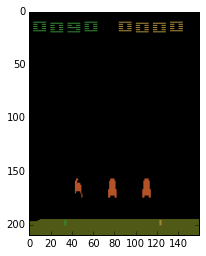

In [89]:
%matplotlib inline
import matplotlib.pyplot as plt
from util.palettes import pal_palette
from agents.ALEVisionAgent import ALEVisionAgent
plt.imshow(agent.as_RGB(bg.reshape((210,160))))